In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from pathlib import Path
import os


In [2]:
# Check and change the current working directory - A.F.
print(os.getcwd())
os.chdir(Path().resolve())
# read in data set with first column (district name) set to index
df = pd.read_excel("../Data/cleaned_data_encoded.xlsx", index_col =0)

c:\Users\turks\OneDrive\Masaüstü\Capstone Project\Notebook


In [3]:
df.shape

(223, 23)

In [4]:
columns_to_drop = ["dropout_rate_pct","still_in_school_pct","in_district_expenditures",
                   'non_grad_completers_pct', 'hs_equivalency_pct',
    "overall_classification_Not requiring assistance or intervention",
    "overall_classification_Requiring assistance or intervention",
    "reason_for_classification_In need of broad/comprehensive support",
    "reason_for_classification_In need of focused/targeted support",
    "reason_for_classification_Limited or no progress toward targets",
    "reason_for_classification_Meeting or exceeding targets",
    "reason_for_classification_Moderate progress toward targets",
    "reason_for_classification_Substantial progress toward targets"
]

## ET

In [5]:
# drop the columns_to_drop from df dataset
df = df.drop(columns=columns_to_drop)


In [6]:
df.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,
Abington,11.0,17.8,39,16609.95,88.9,13.9,81.3,37848.0,17.387952,40.85
Acton-Boxborough,6.2,15.5,85,19407.68,96.1,13.0,88.3,69189.5,18.426312,20.10
Agawam,6.2,18.3,46,20414.91,88.0,12.5,89.4,31126.0,18.091600,46.05
Amesbury,2.7,23.7,47,22338.70,88.3,10.6,89.0,41139.0,17.503544,40.10
Amherst-Pelham,7.3,24.2,33,26177.60,90.9,10.2,81.3,34325.0,17.296413,36.90


In [7]:
#find duplicate columns
duplicate_columns = df.columns[df.columns.duplicated()].tolist()
if duplicate_columns:
    print("Duplicate columns found:", duplicate_columns)
else:
    print("No duplicate columns found.")
    

No duplicate columns found.


In [8]:
df.columns, df.shape

(Index(['english_learners_pct', 'students_with_disabilities_pct',
        'progress_toward_improvement_targets_pct',
        'in_district_expenditures_per_pupil', 'graduation_rate_pct',
        'student_teacher_ratio', 'experienced_teachers_pct',
        'DOR_income_per_capita', 'log_in_district_expenditures',
        'needs_income_avg_pct'],
       dtype='object'),
 (223, 10))

In [9]:
df.dtypes

english_learners_pct                       float64
students_with_disabilities_pct             float64
progress_toward_improvement_targets_pct      int64
in_district_expenditures_per_pupil         float64
graduation_rate_pct                        float64
student_teacher_ratio                      float64
experienced_teachers_pct                   float64
DOR_income_per_capita                      float64
log_in_district_expenditures               float64
needs_income_avg_pct                       float64
dtype: object

In [10]:
#find the schools name Weston and NorthBrookfield
df[df.index.isin(['Weston', 'North Brookfield'])]

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,
North Brookfield,5.0,24.6,15,20008.84,66.7,10.8,74.7,30230.0,15.985920,57.20
Weston,3.3,17.2,86,29581.26,95.0,11.9,82.6,333105.0,17.904114,17.75


In [11]:
#Drop these 2 rows 
df = df.drop(index=['Weston', 'North Brookfield'])

In [12]:
df.shape

(221, 10)

In [13]:
df.columns

Index(['english_learners_pct', 'students_with_disabilities_pct',
       'progress_toward_improvement_targets_pct',
       'in_district_expenditures_per_pupil', 'graduation_rate_pct',
       'student_teacher_ratio', 'experienced_teachers_pct',
       'DOR_income_per_capita', 'log_in_district_expenditures',
       'needs_income_avg_pct'],
      dtype='object')

In [14]:
df.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,
Abington,11.0,17.8,39,16609.95,88.9,13.9,81.3,37848.0,17.387952,40.85
Acton-Boxborough,6.2,15.5,85,19407.68,96.1,13.0,88.3,69189.5,18.426312,20.10
Agawam,6.2,18.3,46,20414.91,88.0,12.5,89.4,31126.0,18.091600,46.05
Amesbury,2.7,23.7,47,22338.70,88.3,10.6,89.0,41139.0,17.503544,40.10
Amherst-Pelham,7.3,24.2,33,26177.60,90.9,10.2,81.3,34325.0,17.296413,36.90


In [15]:
# E.T.
# test train splitfrom sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['graduation_rate_pct'])
y = df['graduation_rate_pct']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (176, 9)
X_test shape: (45, 9)
y_train shape: (176,)
y_test shape: (45,)


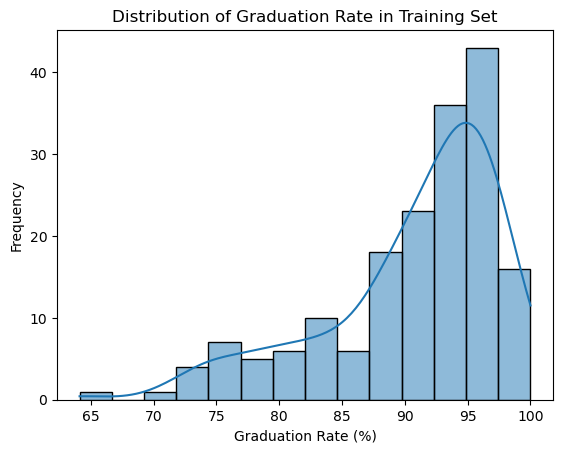

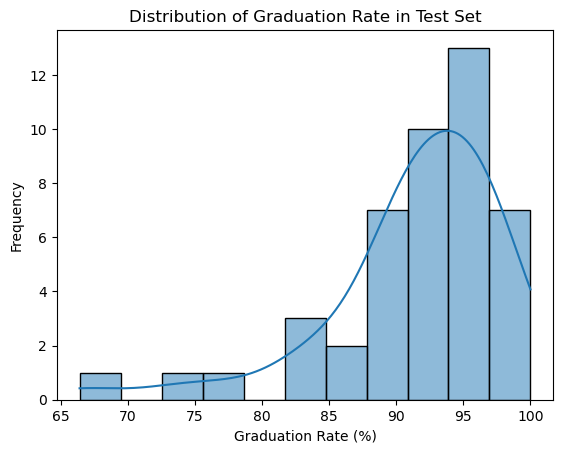

In [16]:
#check the datas if normally distributed

# Plot the distribution of the target variable
sns.histplot(y_train, kde=True)
plt.title("Distribution of Graduation Rate in Training Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()
# Plot the distribution of the target variable in the test set
sns.histplot(y_test, kde=True)
plt.title("Distribution of Graduation Rate in Test Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()

#### Importing the StandardScaler for feature scaling

In [17]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Print the first few rows of the scaled training data
X_train_scaled.head()



,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,
Winthrop,0.279460,-1.010122,0.158734,-0.942874,0.698806,-1.549542,-0.436992,-0.590673,0.196956
Masconomet,-0.795053,0.224900,0.388198,0.891790,-0.133143,1.181490,0.958295,-0.469751,-1.251717
North Adams,-0.725729,1.645176,-0.587024,1.084742,-1.658384,-1.032860,-1.030252,-0.733176,1.736172
Middleborough,-0.552421,-0.145606,-1.160684,-0.465801,1.461426,0.325275,-0.551624,0.094778,0.204945
Quincy,1.076679,0.348403,0.158734,-0.357807,0.976122,-0.161882,-0.442582,1.600840,0.852055


## Models 

#### Checking the Cross validation scores and fitting the models to our train dataset

In [18]:
# Create RandomForestRegressor model by using Crossvalidation


# Initialize the model
rf_model_2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
rf_cv_scores = cross_val_score(rf_model_2, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
rf_cv_scores = -rf_cv_scores

# Print the cross-validation scores
print("Cross-validation MSE scores:", rf_cv_scores)
print("Mean MSE:", np.mean(rf_cv_scores))
print("Standard Deviation of MSE:", np.std(rf_cv_scores))

Cross-validation MSE scores: [16.72092747 20.24074003 17.87707817 12.96840994 17.93683746]
Mean MSE: 17.14879861444441
Standard Deviation of MSE: 2.3820252391189833


#### Lets see after fitting the RF model to train dataset, see the training datasets MSE scores and R2

In [19]:
#### Lets see after fitting the RF model to train dataset, see the training datasets MSE scores and R2
# Fit the model
rf_model_2.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred_rf = rf_model_2.predict(X_train_scaled)

# Training set metrics
print("Train MSE:", mean_squared_error(y_train, y_train_pred_rf))
print("Train R2:", r2_score(y_train, y_train_pred_rf))


Train MSE: 2.534905244318198
Train R2: 0.9482348362093225


#### use rf_model_2 on test data

In [20]:
#use rf_model_2 to predict the graduation rate for the test set
y_pred_test_rf = rf_model_2.predict(X_test_scaled)

# Calculate metrics on test set
test_mse_rf = mean_squared_error(y_test, y_pred_test_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

print("Test MSE (RF):", test_mse_rf)
print("Test R2 (RF):", test_r2_rf)

Test MSE (RF): 13.799612088888898
Test R2 (RF): 0.6794596454215867


#### Lets prune the rf_model_2 and see what would be the results. 

In [21]:
# Initialize the pruned Random Forest model
rf_model_2_pruned = RandomForestRegressor(
    n_estimators=100,          # number of trees
    max_depth=10,              # limit depth of each tree (prunes them)
    min_samples_split=10,      # need at least 10 samples to split a node
    min_samples_leaf=5,        # leaf must contain at least 5 samples
    max_features="sqrt",       # use sqrt(#features) for each split
    random_state=42,
    n_jobs=-1                  # use all CPUs
)

# Perform cross-validation (5-fold, scoring by MSE)
rf_cv_scores = cross_val_score(
    rf_model_2_pruned,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Convert negative MSE to positive
rf_cv_scores = -rf_cv_scores

print("Cross-validation MSE scores:", rf_cv_scores)
print("Mean MSE:", np.mean(rf_cv_scores))
print("Std Dev MSE:", np.std(rf_cv_scores))


Cross-validation MSE scores: [18.4479519  19.24360735 16.77895941 13.78454501 14.66908192]
Mean MSE: 16.584829117620135
Std Dev MSE: 2.1018893002605585


#### Feature importance analysis for rf_model_2

In [22]:
# Feature importance
feature_importances = rf_model_2.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [23]:
importance_df

,Feature,Importance
8,needs_income_avg_pct,0.760348
0,english_learners_pct,0.043439
5,experienced_teachers_pct,0.038838
2,progress_toward_improvement_targets_pct,0.036666
3,in_district_expenditures_per_pupil,0.033554
6,DOR_income_per_capita,0.028307
1,students_with_disabilities_pct,0.020996
7,log_in_district_expenditures,0.020828
4,student_teacher_ratio,0.017023


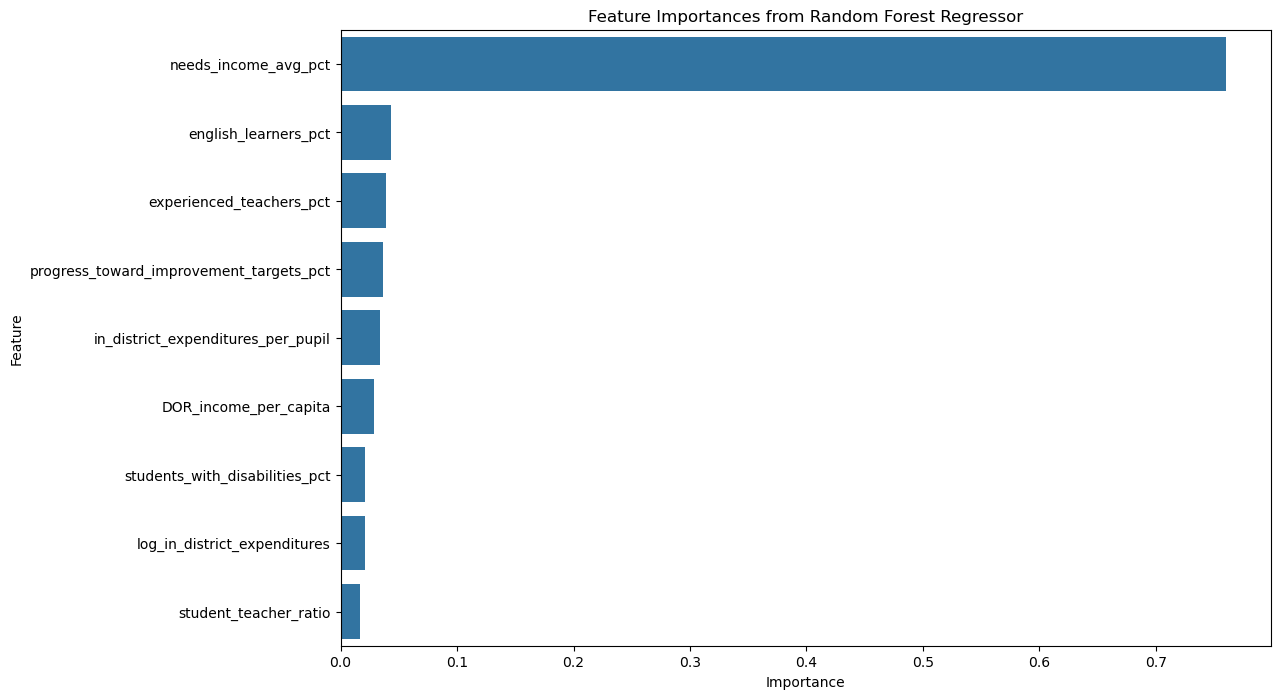

In [24]:
# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest Regressor')
plt.show()

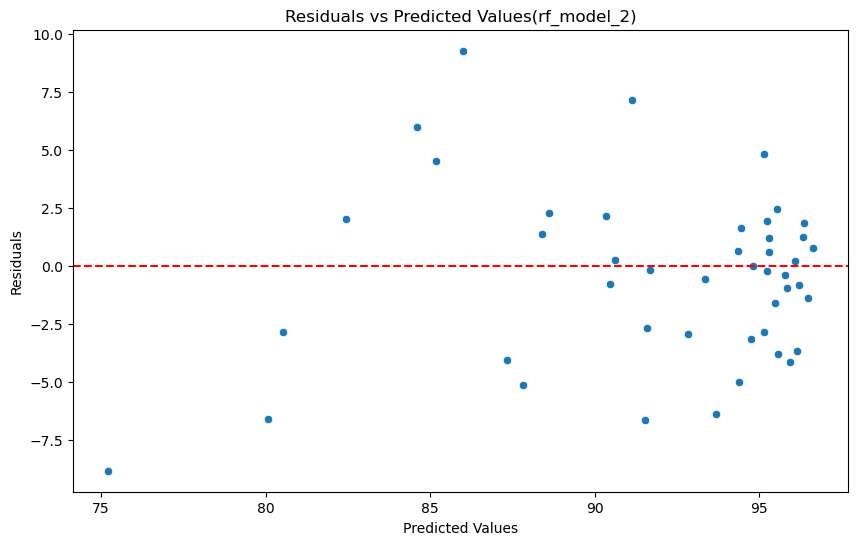

In [25]:
#residual analysis
residuals = y_test - y_pred_test_rf
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test_rf, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values(rf_model_2)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### Checking Train and Test performance, detecting overfitting / underfitting 


Here are the results for train and test data 
* The model fits the training data extremely well (R² ≈ 0.95). 
* On the test data, performance drops to R² ≈ 0.68 — still decent, but much lower than training.
* The model has learned patterns in the training data too specifically (it memorized noise along with signal).
* When it sees new/unseen data, performance suffers.
* That’s a classic sign of overfitting.
* No underfitting since the train R^2 is over 0.9

#### Perform Hyperparamter tuning of Random forest 

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np


rf_model = RandomForestRegressor(random_state=42)


param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Removed 'auto'
}



random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings sampled
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit on training data
random_search.fit(X_train_scaled, y_train)

#best model
best_rf_model = random_search.best_estimator_

#cross-validation
rf_cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rf_cv_scores = -rf_cv_scores

print("Best Parameters:", random_search.best_params_)
print("Cross-validation MSE scores:", rf_cv_scores)
print("Mean MSE:", np.mean(rf_cv_scores))
print("Standard Deviation of MSE:", np.std(rf_cv_scores))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}
Cross-validation MSE scores: [16.95949274 18.68322745 15.95249023 12.69197294 15.0108768 ]
Mean MSE: 15.859612033716592
Standard Deviation of MSE: 1.9972709824415062


In [27]:
# Check metrics for training set
best_rf_model.fit(X_train_scaled, y_train)
y_train_pred_rf_best = best_rf_model.predict(X_train_scaled)

# Training set metrics for best RF model
print("Train MSE (Best RF):", mean_squared_error(y_train, y_train_pred_rf_best))
print("Train R2 (Best RF):", r2_score(y_train, y_train_pred_rf_best))

Train MSE (Best RF): 6.610952942486418
Train R2 (Best RF): 0.8649980851760337


In [28]:
# Using the best_rf_model from the first tunning.

from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred_test = best_rf_model.predict(X_test_scaled)

# Calculate metrics on test set
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("Test MSE:", test_mse)
print("Test R2:", test_r2)

Test MSE: 13.926162838327167
Test R2: 0.6765200974230043


In [29]:
# Check feature importance for the best Random Forest model
importance_df_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf_model.feature_importances_
})
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)
importance_df_rf

,Feature,Importance
8,needs_income_avg_pct,0.385220
6,DOR_income_per_capita,0.211922
0,english_learners_pct,0.122978
5,experienced_teachers_pct,0.101227
2,progress_toward_improvement_targets_pct,0.067990
1,students_with_disabilities_pct,0.040278
7,log_in_district_expenditures,0.031185
3,in_district_expenditures_per_pupil,0.020911
4,student_teacher_ratio,0.018290


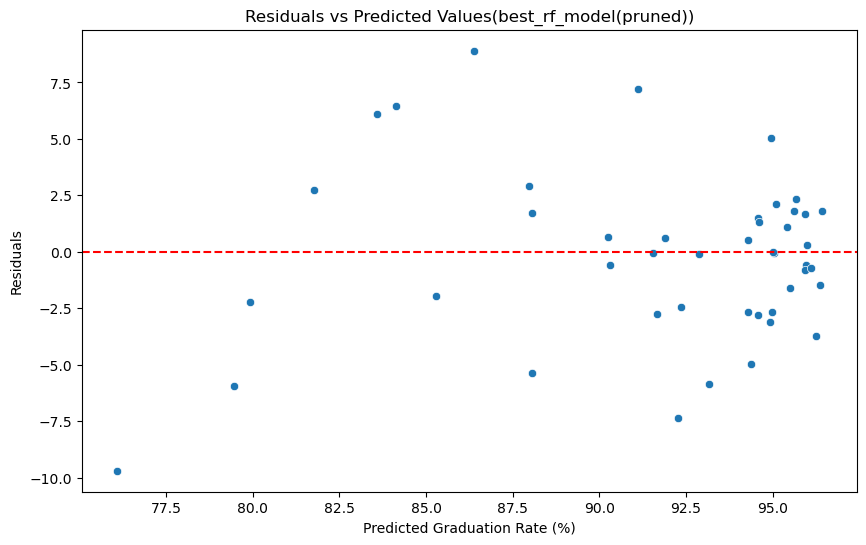

In [30]:
#residuals plot for the best_rf_model
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values(best_rf_model(pruned))")
plt.xlabel("Predicted Graduation Rate (%)")
plt.ylabel("Residuals")
plt.show()

## XGBOOST MODEL 

#### E.T.

In [31]:
# XGBoost cross-validation
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score 

xgb_model_cv = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_cv_scores = cross_val_score(xgb_model_cv, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
xgb_cv_scores = -xgb_cv_scores

print("XGBoost Cross-validation MSE scores:", xgb_cv_scores)
print("Mean MSE (XGBoost):", np.mean(xgb_cv_scores))
print("Standard Deviation of MSE (XGBoost):", np.std(xgb_cv_scores))

XGBoost Cross-validation MSE scores: [27.20108513 23.09804587 19.39571041 12.95533592 19.49675295]
Mean MSE (XGBoost): 20.429386055591873
Standard Deviation of MSE (XGBoost): 4.706960140935808


In [32]:
# XGBoost model metrics for training set
xgb_model_cv.fit(X_train_scaled, y_train)
y_train_pred_xgb = xgb_model_cv.predict(X_train_scaled) 

# Training set metrics for XGBoost
print("Train MSE (XGBoost):", mean_squared_error(y_train, y_train_pred_xgb))
print("Train R2 (XGBoost):", r2_score(y_train, y_train_pred_xgb))

Train MSE (XGBoost): 9.027582101139514e-07
Train R2 (XGBoost): 0.9999999815648231


In [33]:
# check metrics for test set
y_pred_test_xgb = xgb_model_cv.predict(X_test_scaled)

# Calculate metrics on test set
test_mse_xgb = mean_squared_error(y_test, y_pred_test_xgb)
test_r2_xgb = r2_score(y_test, y_pred_test_xgb)

print("Test MSE (XGBoost):", test_mse_xgb)
print("Test R2 (XGBoost):", test_r2_xgb)

Test MSE (XGBoost): 12.265545629249775
Test R2 (XGBoost): 0.715093270754831


#### Check feature importance for XGBoost

<Figure size 1200x800 with 0 Axes>

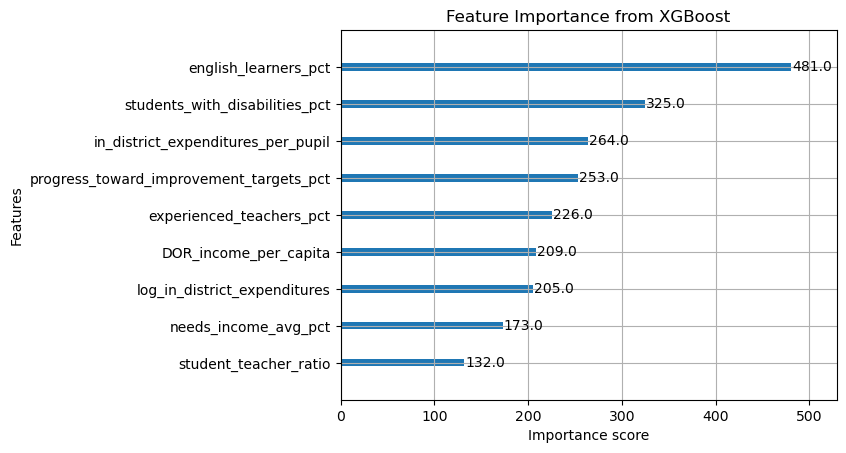

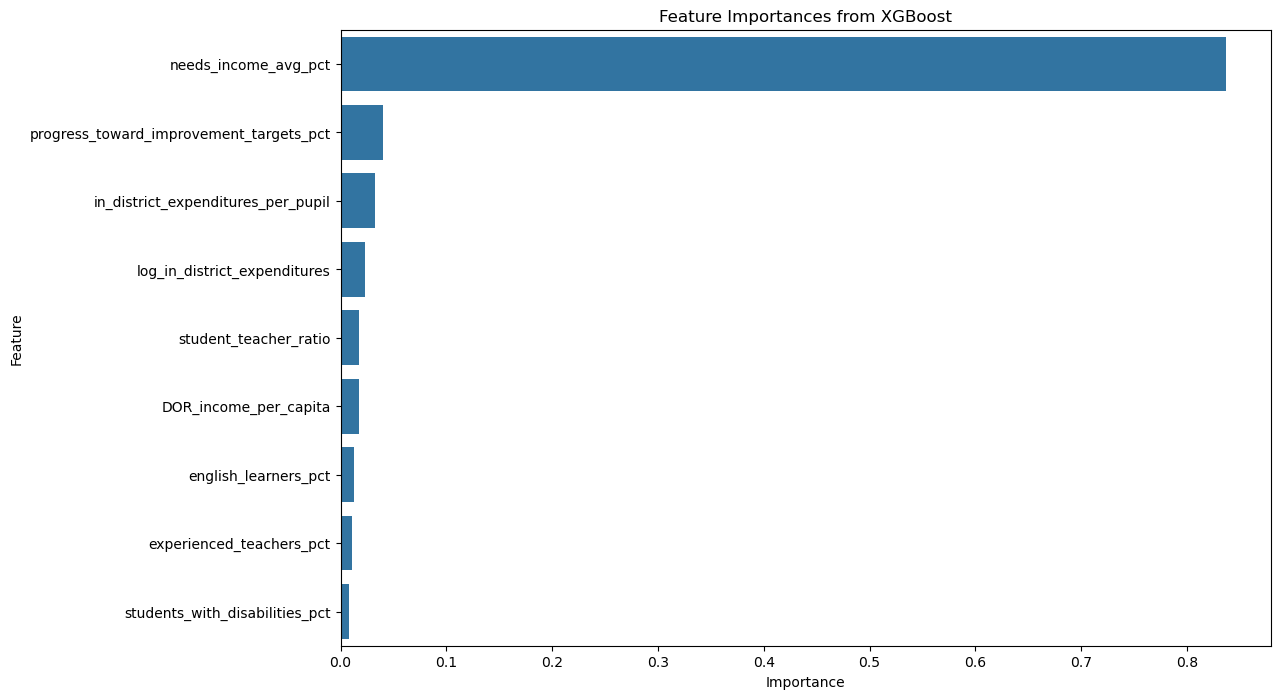

In [34]:
#feature importance for XGBoost
import matplotlib.pyplot as plt 
import xgboost as xgb

# Plot feature importance
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_model_cv, importance_type='weight', max_num_features=15)
plt.title('Feature Importance from XGBoost')
plt.show()

# Feature importance for XGBoost
feature_importances_xgb = xgb_model_cv.feature_importances_

# Create a DataFrame for feature importances
importance_df_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_xgb
})

# Sort the DataFrame by importance
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

# Plotting feature importances for XGBoost
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb)
plt.title('Feature Importances from XGBoost')
plt.show()


In [35]:
importance_df_xgb

,Feature,Importance
8,needs_income_avg_pct,0.837178
2,progress_toward_improvement_targets_pct,0.040274
3,in_district_expenditures_per_pupil,0.033012
7,log_in_district_expenditures,0.022689
4,student_teacher_ratio,0.017570
6,DOR_income_per_capita,0.017383
0,english_learners_pct,0.013020
5,experienced_teachers_pct,0.011301
1,students_with_disabilities_pct,0.007574


**The feature importance also shows that the XGBoost might have overfitting in the data. We will do some tunning.**

#### Tunning XGBoost with early stopping

Top 5 CV configs (lower RMSE is better):
       rmse       std  best_iter  learning_rate  max_depth  min_child_weight  \
0  3.933635  0.441081         36       0.120979          3          1.759999   
1  3.985686  0.429658         14       0.186237          7          4.578204   
2  3.988471  0.494794         17       0.166995          3          2.262242   
3  3.989287  0.554510         82       0.053175          3          1.574355   
4  4.012344  0.537832        132       0.028831          3          8.592175   

   subsample  colsample_bytree     gamma  reg_alpha  reg_lambda  
0   0.766323          0.616646  0.246995   0.098958    0.644524  
1   0.720379          0.795434  0.331432   0.286687    0.786446  
2   0.821614          0.643430  0.336120   0.084370    1.159423  
3   0.931052          0.852666  0.379044   0.106358    1.470698  
4   0.961061          0.991828  0.401013   0.233843    1.142483  

Best CV result:
{'iter': 16, 'rmse': 3.933635275202227, 'std': np.float64(0.44108

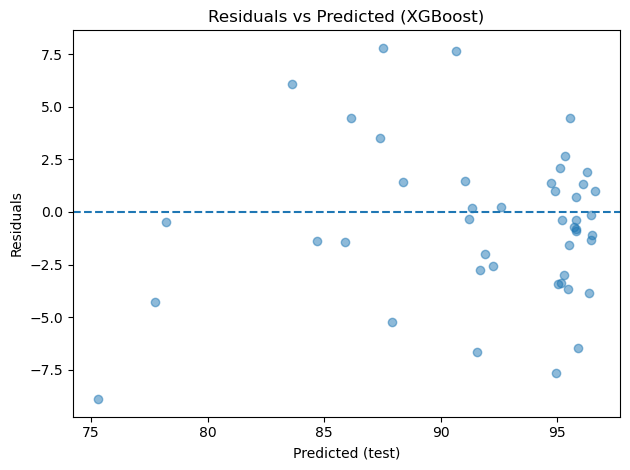

ValueError: invalid literal for int() with base 10: 'nglish_learners_pct'

In [36]:
# Version-agnostic XGBoost tuning with early stopping using native API
# - Randomized param search with xgb.cv (k-fold + early stopping)
# - Final train with best params/rounds on full training set
# - Test metrics + gain-based feature importances

import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt

# ===== 0) Data: use your scaled or unscaled matrices
Xtr = X_train_scaled   # or X_train
Xte = X_test_scaled    # or X_test
ytr = y_train
yte = y_test

# DMatrix (native API)
dtrain_full = xgb.DMatrix(Xtr, label=ytr)
dtest       = xgb.DMatrix(Xte, label=yte)

# ===== 1) Randomized param sampler (you can tweak ranges)
rng = np.random.default_rng(42)
def sample_params():
    return {
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "tree_method": "hist",
        "learning_rate": float(uniform(0.01, 0.19).rvs(random_state=rng)),
        "max_depth": int(randint(3, 10).rvs(random_state=rng)),
        "min_child_weight": float(uniform(1.0, 9.0).rvs(random_state=rng)),
        "subsample": float(uniform(0.6, 0.4).rvs(random_state=rng)),
        "colsample_bytree": float(uniform(0.6, 0.4).rvs(random_state=rng)),
        "gamma": float(uniform(0.0, 0.5).rvs(random_state=rng)),
        "reg_alpha": float(uniform(0.0, 0.3).rvs(random_state=rng)),
        "reg_lambda": float(uniform(0.5, 1.0).rvs(random_state=rng)),
    }

# ===== 2) CV-based randomized search with early stopping
n_iter = 40          # increase for a deeper search
nfold = 5
num_boost_round = 3000
early_stopping_rounds = 100

records = []
best_cv_rmse = np.inf
best = None

for i in range(n_iter):
    params = sample_params()
    cv_hist = xgb.cv(
        params=params,
        dtrain=dtrain_full,
        num_boost_round=num_boost_round,
        nfold=nfold,
        stratified=False,
        early_stopping_rounds=early_stopping_rounds,
        verbose_eval=False,
        seed=42
    )
    # cv returns a DataFrame with test-rmse-mean, test-rmse-std
    best_iter = len(cv_hist)
    rmse = cv_hist["test-rmse-mean"].min()
    std  = cv_hist["test-rmse-std"].iloc[cv_hist["test-rmse-mean"].idxmin()]
    rec = {"iter": i, "rmse": rmse, "std": std, "best_iter": best_iter, **params}
    records.append(rec)

    if rmse < best_cv_rmse:
        best_cv_rmse = rmse
        best = rec

# Summary of top configs
res_df = pd.DataFrame(records).sort_values("rmse").reset_index(drop=True)
print("Top 5 CV configs (lower RMSE is better):")
print(res_df.head(5)[["rmse","std","best_iter","learning_rate","max_depth","min_child_weight",
                      "subsample","colsample_bytree","gamma","reg_alpha","reg_lambda"]])

print("\nBest CV result:")
print(best)

# ===== 3) Final train on full training set using best params and best num_boost_round
final_params = {k: best[k] for k in [
    "objective","eval_metric","tree_method","learning_rate","max_depth","min_child_weight",
    "subsample","colsample_bytree","gamma","reg_alpha","reg_lambda"
]}
final_num_boost_round = int(best["best_iter"])

final_model = xgb.train(
    params=final_params,
    dtrain=dtrain_full,
    num_boost_round=final_num_boost_round,
    evals=[(dtrain_full, "train")],  # you could add a held-out split if desired
    verbose_eval=False
)

# ===== 4) Evaluate on test
y_pred = final_model.predict(dtest)
test_mse = mean_squared_error(yte, y_pred)
test_r2  = r2_score(yte, y_pred)
print(f"\n=== XGBoost Test Performance ===")
print(f"Test MSE: {test_mse:.4f} | Test R²: {test_r2:.4f}")
print(f"(Best CV RMSE: {best_cv_rmse:.4f}, Best rounds: {final_num_boost_round})")

# ===== 5) Diagnostics: residuals + feature importance (gain)
residuals = yte - y_pred
plt.figure()
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted (test)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (XGBoost)")
plt.tight_layout()
plt.show()

# Feature gain importances (map f0,f1,... to column names if available)
f_gain = final_model.get_score(importance_type="gain")
cols = list(getattr(getattr(X_train_scaled, "columns", None), "__iter__", lambda: [])())  # try to fetch columns
if not cols:
    cols = [f"f{i}" for i in range(len(f_gain))]

series = pd.Series({int(k[1:]): v for k, v in f_gain.items()})
series.index = [cols[i] if i < len(cols) else f"f{i}" for i in series.index]
top15 = series.sort_values(ascending=False).head(15)
print("\nTop 15 Feature Importances (gain):")
print(top15)
top15.plot(kind="bar")
plt.title("Top 15 XGBoost Feature Importances (gain)")
plt.tight_layout()
plt.show()


In [ ]:
# train metrics for final_model
y_train_pred_final = final_model.predict(dtrain_full)
# Training set metrics for final_model
train_mse_final = mean_squared_error(ytr, y_train_pred_final)
train_r2_final = r2_score(ytr, y_train_pred_final)

print(f"Final Model Train MSE: {train_mse_final:.4f} | Train R²: {train_r2_final:.4f}")

Final Model Train MSE: 3.8567 | Train R²: 0.9212



Top 15 Feature Importances (gain):
needs_income_avg_pct                       455.993835
DOR_income_per_capita                      150.138290
english_learners_pct                        77.138573
in_district_expenditures_per_pupil          66.622749
progress_toward_improvement_targets_pct     56.174152
experienced_teachers_pct                    35.145905
student_teacher_ratio                       33.644417
log_in_district_expenditures                28.956949
students_with_disabilities_pct              28.352160
dtype: float64


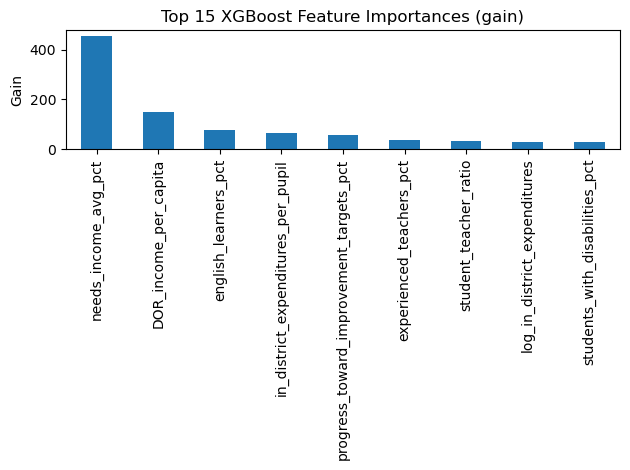

In [ ]:
# Robust gain-based feature importance for XGBoost (handles 'f0' keys or real names)
import pandas as pd
import matplotlib.pyplot as plt

f_gain = final_model.get_score(importance_type="gain")   # dict: {feature_key: gain}

if not f_gain:
    print("No feature importance available (gain).")
else:
    # If keys are like 'f0','f1',... map them to DataFrame column names when available.
    keys = list(f_gain.keys())
    use_index_keys = all(k.startswith("f") and k[1:].isdigit() for k in keys)

    if use_index_keys:
        # Try to map fN -> column names; fall back to fN if out of range
        try:
            cols = list(getattr(X_train_scaled, "columns", []))
        except Exception:
            cols = []
        def map_key(k):
            idx = int(k[1:])
            return cols[idx] if cols and idx < len(cols) else k
        series = pd.Series({map_key(k): v for k, v in f_gain.items()})
    else:
        # Keys are already real feature names — use as-is
        series = pd.Series(f_gain)

    series = series.sort_values(ascending=False)
    top15 = series.head(15)

    print("\nTop 15 Feature Importances (gain):")
    print(top15)

    ax = top15.plot(kind="bar")
    ax.set_title("Top 15 XGBoost Feature Importances (gain)")
    ax.set_ylabel("Gain")
    plt.tight_layout()
    plt.show()


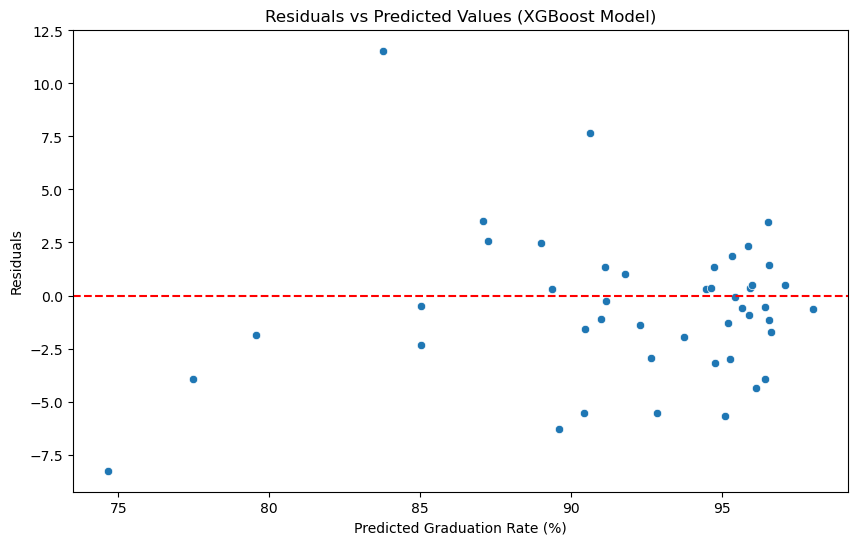

In [ ]:
#check residuals for xgboost model
residuals_xgb = y_test - y_pred_test_xgb
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test_xgb, y=residuals_xgb)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values (XGBoost Model)")
plt.xlabel("Predicted Graduation Rate (%)")
plt.ylabel("Residuals")
plt.show()

### Different Regression Models

##### Support Vector Regression(SVR)

In [ ]:
#check SVR model for cross validation
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_cv_scores = cross_val_score(svr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
svr_cv_scores = -svr_cv_scores

print("SVR Cross-validation MSE scores:", svr_cv_scores)
print("Mean MSE (SVR):", np.mean(svr_cv_scores))
print("Standard Deviation of MSE (SVR):", np.std(svr_cv_scores))

SVR Cross-validation MSE scores: [39.65765664 30.06950472 20.26533655 23.51904392 18.64086031]
Mean MSE (SVR): 26.43048042847091
Standard Deviation of MSE (SVR): 7.685887474836358


In [ ]:
#Check svr model metrics for training set
svr_model.fit(X_train_scaled, y_train)
y_train_pred_svr = svr_model.predict(X_train_scaled)

# Training set metrics for SVR
print("Train MSE (SVR):", mean_squared_error(y_train, y_train_pred_svr))
print("Train R2 (SVR):", r2_score(y_train, y_train_pred_svr))

Train MSE (SVR): 21.12222028625674
Train R2 (SVR): 0.5686642744569583


In [ ]:
#Create SVR model
from sklearn.svm import SVR

# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model
svr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_test_svr = svr_model.predict(X_test_scaled)

# Calculate metrics on test set
test_mse_svr = mean_squared_error(y_test, y_pred_test_svr)
test_r2_svr = r2_score(y_test, y_pred_test_svr)

print("Test MSE (SVR):", test_mse_svr)
print("Test R2 (SVR):", test_r2_svr)


Test MSE (SVR): 23.53471614154744
Test R2 (SVR): 0.4533305568068813


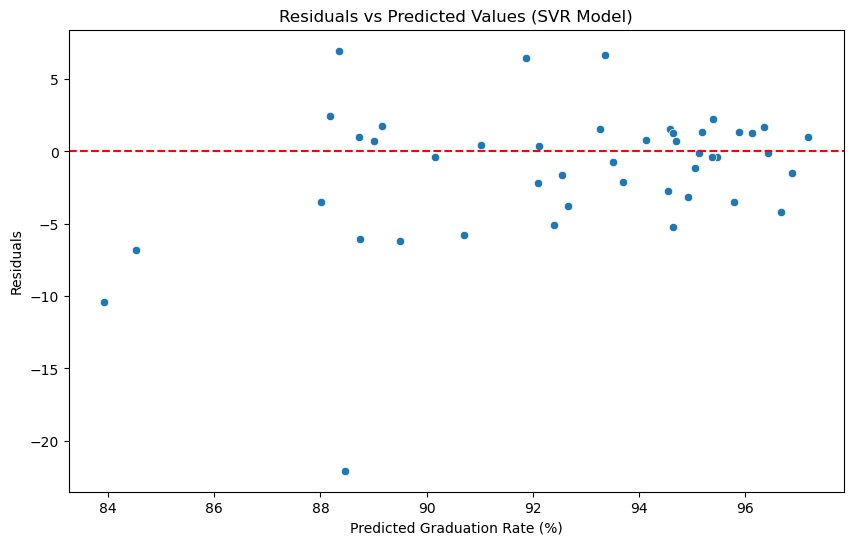

In [ ]:
#Residuals plot for the SVR model
residuals_svr = y_test - y_pred_test_svr
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test_svr, y=residuals_svr)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values (SVR Model)")
plt.xlabel("Predicted Graduation Rate (%)")
plt.ylabel("Residuals")
plt.show()

#### CatBoost Model
##### E. T.

In [ ]:
# !pip install catboost

In [ ]:
#check metrics for CatBoost model cross-validation
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, verbose=0)
catboost_cv_scores = cross_val_score(catboost_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
catboost_cv_scores = -catboost_cv_scores

print("CatBoost Cross-validation MSE scores:", catboost_cv_scores)
print("Mean MSE (CatBoost):", np.mean(catboost_cv_scores))
print("Standard Deviation of MSE (CatBoost):", np.std(catboost_cv_scores))

CatBoost Cross-validation MSE scores: [19.67740813 23.08447171 15.93325955 16.35640524 16.2305397 ]
Mean MSE (CatBoost): 18.256416865688717
Standard Deviation of MSE (CatBoost): 2.772746366838874


In [ ]:
#check the metrics for catboost model for training set
catboost_model.fit(X_train_scaled, y_train)
y_train_pred_catboost = catboost_model.predict(X_train_scaled)

# Training set metrics for CatBoost
print("Train MSE (CatBoost):", mean_squared_error(y_train, y_train_pred_catboost))
print("Train R2 (CatBoost):", r2_score(y_train, y_train_pred_catboost))

Train MSE (CatBoost): 2.8250906342440056e-06
Train R2 (CatBoost): 0.9999999423089759


In [ ]:
#Check the metrics for catboost model for test set
y_pred_test_catboost = catboost_model.predict(X_test_scaled)

# Calculate metrics on test set
test_mse_catboost = mean_squared_error(y_test, y_pred_test_catboost)
test_r2_catboost = r2_score(y_test, y_pred_test_catboost)

print("Test MSE (CatBoost):", test_mse_catboost)
print("Test R2 (CatBoost):", test_r2_catboost)

Test MSE (CatBoost): 12.513514213776878
Test R2 (CatBoost): 0.7093334031950302


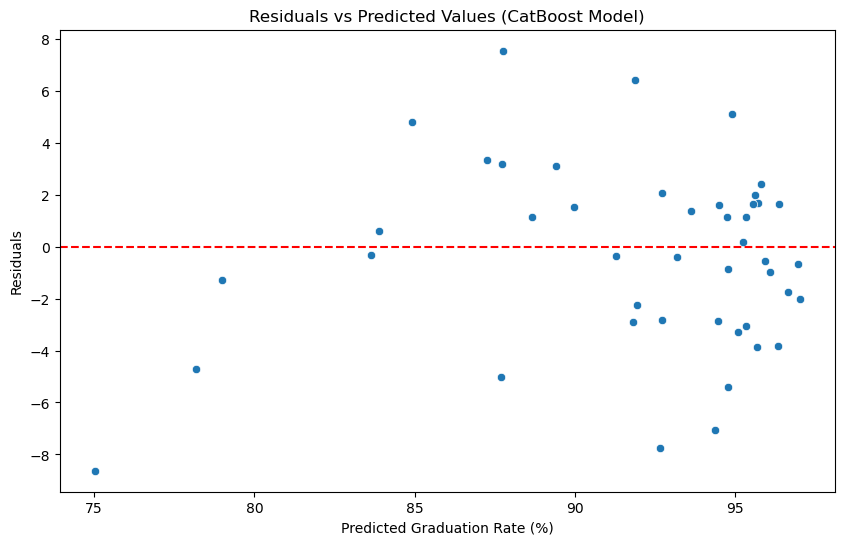

In [ ]:
# residuals plot for the CatBoost model
residuals_catboost = y_test - y_pred_test_catboost
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test_catboost, y=residuals_catboost)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values (CatBoost Model)")
plt.xlabel("Predicted Graduation Rate (%)")
plt.ylabel("Residuals")
plt.show()

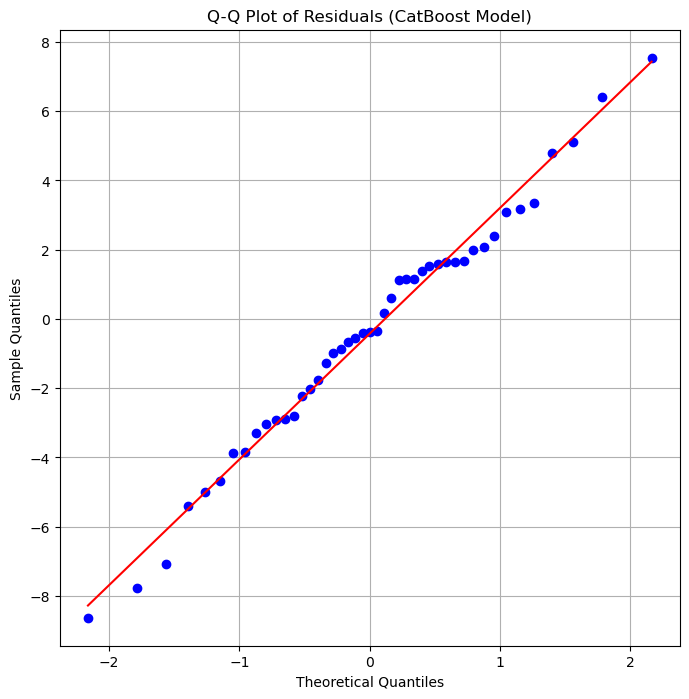

In [ ]:
#create Q-q plot for the residuals of the CatBoost model
import scipy.stats as stats

# Q-Q plot for residuals of CatBoost model
plt.figure(figsize=(8, 8))
stats.probplot(residuals_catboost, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (CatBoost Model)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid()
plt.show()

#### LASSO REGRESSION
##### E. T. 

In [ ]:
#create lasso regression model
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Initialize the Lasso model
lasso_model = Lasso(random_state=42)

# Define the hyperparameter grid for Lasso
param_grid = {
    'alpha': np.logspace(-4, 4, 100)  # Regularization strength
}

# Perform grid search with cross-validation
lasso_grid_search = GridSearchCV(
    estimator=lasso_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the training data
lasso_grid_search.fit(X_train_scaled, y_train)

# Get the best Lasso model
best_lasso_model = lasso_grid_search.best_estimator_

# Check the best hyperparameter
best_alpha = lasso_grid_search.best_params_['alpha']
print(f"Best alpha for Lasso: {best_alpha}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best alpha for Lasso: 0.521400828799969


In [ ]:
#check cv metrics for the best Lasso model
lasso_cv_scores = cross_val_score(best_lasso_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
lasso_cv_scores = -lasso_cv_scores

print("Lasso Cross-validation MSE scores:", lasso_cv_scores)
print("Mean MSE (Lasso):", np.mean(lasso_cv_scores))
print("Standard Deviation of MSE (Lasso):", np.std(lasso_cv_scores))


#check the metrics for the best Lasso model for training set
best_lasso_model.fit(X_train_scaled, y_train)
y_train_pred_lasso = best_lasso_model.predict(X_train_scaled)
# Training set metrics for best Lasso model
print("Train MSE (Best Lasso):", mean_squared_error(y_train, y_train_pred_lasso))
print("Train R2 (Best Lasso):", r2_score(y_train, y_train_pred_lasso))

#check the metrics for the best Lasso model for test set
y_pred_test_lasso = best_lasso_model.predict(X_test_scaled)
# Calculate metrics on test set
test_mse_lasso = mean_squared_error(y_test, y_pred_test_lasso)
test_r2_lasso = r2_score(y_test, y_pred_test_lasso)
print("Test MSE (Best Lasso):", test_mse_lasso)
print("Test R2 (Best Lasso):", test_r2_lasso)



Lasso Cross-validation MSE scores: [17.15257609 15.32015482 15.2289438  14.01910444 11.93283002]
Mean MSE (Lasso): 14.730721834799912
Standard Deviation of MSE (Lasso): 1.7202111679239318
Train MSE (Best Lasso): 13.728922640440722
Train R2 (Best Lasso): 0.7196424084312851
Test MSE (Best Lasso): 14.33893608144703
Test R2 (Best Lasso): 0.6669321118435649


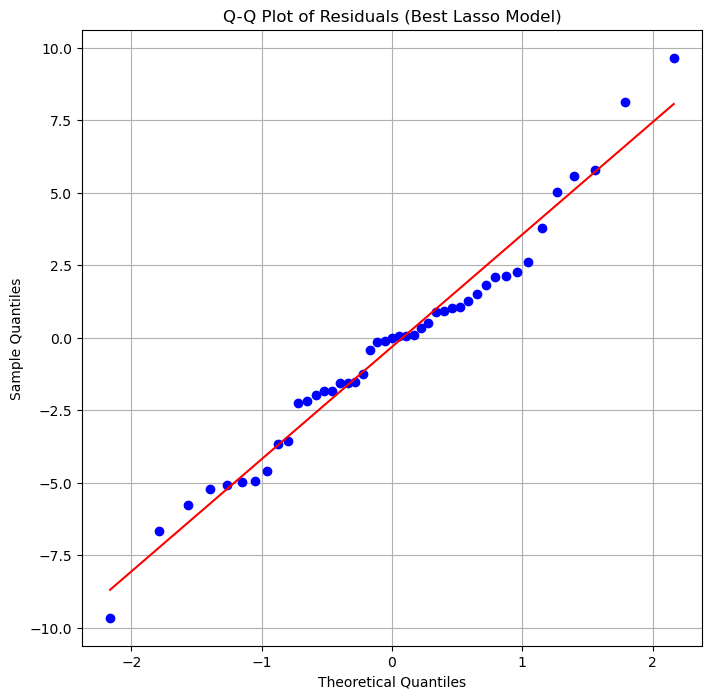

In [ ]:
#Q-Q plot for the residuals of the best Lasso model
import scipy.stats as stats
# Q-Q plot for residuals of the best Lasso model
plt.figure(figsize=(8, 8))
stats.probplot(residuals_lasso, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Best Lasso Model)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid()
plt.show()

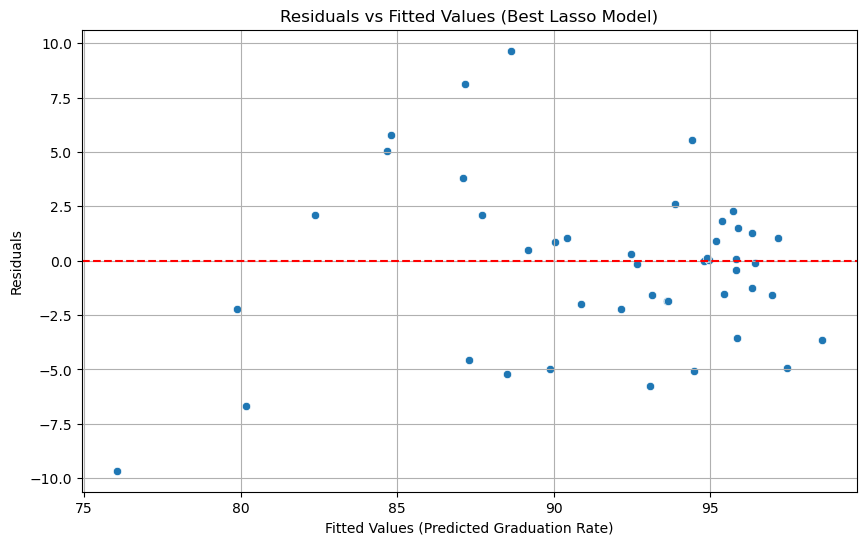

In [ ]:
#check homoscedasticity for the residuals of the best Lasso model
# Residuals vs Fitted Values plot for the best Lasso model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test_lasso, y=residuals_lasso)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values (Best Lasso Model)")
plt.xlabel("Fitted Values (Predicted Graduation Rate)")
plt.ylabel("Residuals")
plt.grid()
plt.show()